In [140]:
#مرتب سازی داده ها
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats

data=pd.read_excel("dataset.xlsx")

data.describe()
data=data.drop(data.iloc[:,0:2],axis=1)
data.describe()
mark=data.iloc[:,[9,10,11,]]
mark.columns=["a","b","c"]
depression=data.iloc[:,[46,48,53,56,59,60,64]]
depression.columns=["e","f","g","h","i","j","k"]
mark=mark.dropna()
depression=depression.dropna()
merge_data=pd.concat([mark,depression],axis=0)
merge_data=merge_data.dropna()

In [141]:
mark["mark_score"]=(mark["a"]+mark["b"]-mark["c"])/3
depression["depression_score"]=(depression["e"]+depression["f"]+depression["g"]+depression["h"]+depression["i"]+depression["j"]+depression["k"])/7

In [142]:
#رگرسیون
import pandas as pd
import statsmodels.api as sm

mark_scores = mark.loc[:179, 'mark_score']
depression_scores = depression.loc[:179, 'depression_score']

mark1_scores = sm.add_constant(mark_scores)

model = sm.OLS(depression_scores, mark1_scores).fit()

# چاپ خلاصهٔ رگرسیون
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       depression_score   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.91
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           0.000424
Time:                        12:12:13   Log-Likelihood:                -193.71
No. Observations:                 178   AIC:                             391.4
Df Residuals:                     176   BIC:                             397.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8141      0.101      8.029      0.0

In [143]:
 #ازمون تی رگرسیون 
t_values = model.tvalues
p_values = model.pvalues
bse = model.bse

print("t:")

print("t-statistic:", t_values[1])
print("p-value:", p_values[1])
print("khata:", bse[1])

# نتایج
alpha = 0.05
if p_values[1] < alpha:
   print("فرض صفر رد می شود")
else:
   print("فرض صفر رد نمی شود ")

t:
t-statistic: 3.59278738305853
p-value: 0.000424400495103758
khata: 0.06252632143205246
فرض صفر رد می شود


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1948\48436960.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("t-statistic:", t_values[1])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1948\48436960.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("p-value:", p_values[1])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1948\48436960.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("khata:", bse[1])
C:\Users\ASUS\AppD

In [144]:
#ازمون اف رگرسیون
simple_model = sm.OLS(depression_scores, sm.add_constant(pd.Series([1] * len(depression_scores), index=depression_scores.index))).fit()

f_test_result = model.compare_f_test(simple_model)

# نمایش نتایج آزمون F
print(f'Test statistic: {f_test_result[0]}')  # آماره آزمون
print(f'P-value: {f_test_result[1]}')          # مقدار P

alpha = 0.05

if f_test_result[1] < alpha:
    print("فرض صفر رد می شود")

else:
    print(" (پذیرش فرض صفر).")

Test statistic: 12.908121179864553
P-value: 0.0004244004951037574
فرض صفر رد می شود


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)


r2 = 0.13570991417544376


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1948\2361043444.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x), max(x), 0.1).reshape(-1, 1)


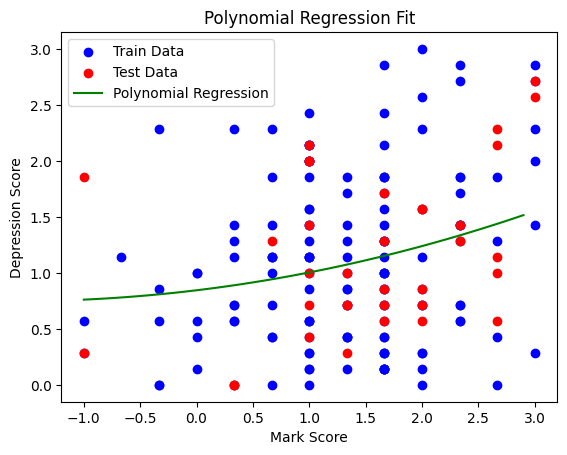

In [145]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = mark.loc[0:179, 'mark_score'].values.reshape(-1, 1)
y = depression.loc[0:179, 'depression_score'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

model = LinearRegression()
model.fit(x_poly_train, y_train)

y_pred = model.predict(x_poly_test)
print("r2 =", r2_score(y_test, y_pred))
x_grid = np.arange(min(x), max(x), 0.1).reshape(-1, 1) 
x_grid_poly = poly.transform(x_grid)  
y_grid_pred = model.predict(x_grid_poly)  
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')
plt.plot(x_grid, y_grid_pred, color='green', label='Polynomial Regression')
plt.title('Polynomial Regression Fit')
plt.xlabel('Mark Score')
plt.ylabel('Depression Score')
plt.legend()
plt.show()


In [146]:
#رگرسیون خطی
x=mark.loc[0:179,'mark_score'].values.reshape(-1,1)
y=depression.loc[0:179,'depression_score'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
print("r2=",r2_score(y_test,y_pred))


r2= 0.10199706224427973


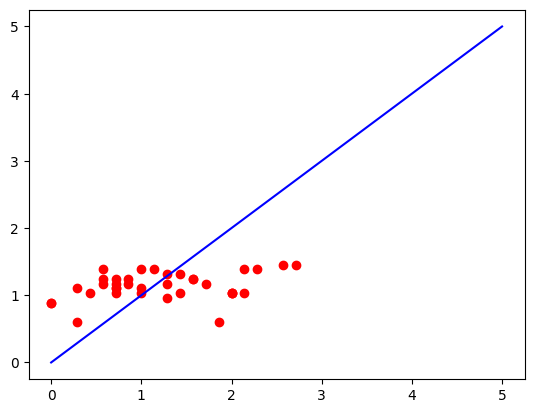

In [147]:
plt.scatter(y_test,y_pred,color="red")
x=np.linspace(0,5,100)
y=x
plt.plot(x,y,color="blue")
plt.show()

In [148]:
from transformers import pipeline

In [149]:

from sklearn.preprocessing import PolynomialFeatures

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
#جدول پیشایندی 
def categorize_score(score):
    return "low" if score <2.5 else "high"

mark['score_category'] = mark['mark_score'].apply(categorize_score)


depression['depression_category'] = depression['depression_score'].apply(categorize_score)


crosstab_result = pd.crosstab(mark['score_category'], depression['depression_category'])


crosstab_result.index.name = 'نمره محوری'
crosstab_result.columns.name = 'افسردگی'
print(crosstab_result)

افسردگی     high  low
نمره محوری           
high           4   13
low            5  157


In [152]:
# محاسبه‌ی ریسک نسبی
total_low_depression = crosstab_result.get('low', pd.Series()).sum()
total_high_depression = crosstab_result.get('high', pd.Series()).sum()

risk_relative = {
    'low_scoreimpact_low': crosstab_result.get('low', pd.Series()).get('low', 0) / total_low_depression if total_low_depression > 0 else 0,
    'low_scoreimpact_high': crosstab_result.get('low', pd.Series()).get('high', 0) / total_high_depression if total_high_depression > 0 else 0,
    'high_scoreimpact_low': crosstab_result.get('high', pd.Series()).get('low', 0) / total_low_depression if total_low_depression > 0 else 0,
    'high_scroreimpact_high': crosstab_result.get('high', pd.Series()).get('high', 0) / total_high_depression if total_high_depression > 0 else 0
}
print("\nجدول ریسک نسبی:")
print(pd.Series(risk_relative, name='ریسک نسبی'))


جدول ریسک نسبی:
low_scoreimpact_low       0.923529
low_scoreimpact_high      1.444444
high_scoreimpact_low      0.029412
high_scroreimpact_high    0.444444
Name: ریسک نسبی, dtype: float64


In [153]:
risk_score = {
    'low_depression_low': crosstab_result.get('low', pd.Series()).get('low', 0) / crosstab_result.loc['low'].sum() if crosstab_result.loc['low'].sum() > 0 else 0,
    'low_depression_high': crosstab_result.get('high', pd.Series()).get('low', 0) / crosstab_result.loc['low'].sum() if crosstab_result.loc['low'].sum() > 0 else 0,
    'high_depression_low': crosstab_result.get('low', pd.Series()).get('high', 0) / crosstab_result.loc['high'].sum() if crosstab_result.loc['high'].sum() > 0 else 0,
    'high_depression_high': crosstab_result.get('high', pd.Series()).get('high', 0) / crosstab_result.loc['high'].sum() if crosstab_result.loc['high'].sum() > 0 else 0
}

# نمایش نتایج
print("\nجدول ریسک نسبی:")
print(pd.Series(risk_score))


جدول ریسک نسبی:
low_depression_low      0.969136
low_depression_high     0.030864
high_depression_low     0.764706
high_depression_high    0.235294
dtype: float64


In [154]:
mark_median = mark['mark_score'].median()
depression_median = depression['depression_score'].median()

# تابع برای دسته‌بندی بر اساس میانه
def categorize_score(score, median):
    return "low" if score < median else "high"
mark['score_category'] = mark['mark_score'].apply(lambda x: categorize_score(x, mark_median))
depression['depression_category'] = depression['depression_score'].apply(lambda x: categorize_score(x, depression_median))

crosstab_result1 = pd.crosstab(mark['score_category'], depression['depression_category'])
crosstab_result1.index.name = 'نمره محوری'
crosstab_result1.columns.name = 'افسردگی'
# نمایش نتیجه
print(crosstab_result1)

افسردگی     high  low
نمره محوری           
high          57   48
low           41   33


In [155]:
total_low_depression = crosstab_result1.get('low', pd.Series()).sum()
total_high_depression = crosstab_result1.get('high', pd.Series()).sum()

risk_relative = {
    'low_scoreimpact_low': crosstab_result1.get('low', pd.Series()).get('low', 0) / total_low_depression if total_low_depression > 0 else 0,
    'low_scoreimpact_high': crosstab_result1.get('low', pd.Series()).get('high', 0) / total_high_depression if total_high_depression > 0 else 0,
    'high_scoreimpact_low': crosstab_result1.get('high', pd.Series()).get('low', 0) / total_low_depression if total_low_depression > 0 else 0,
    'high_scroreimpact_high': crosstab_result1.get('high', pd.Series()).get('high', 0) / total_high_depression if total_high_depression > 0 else 0
}
print("\nجدول ریسک نسبی:")
print(pd.Series(risk_relative, name='ریسک نسبی'))
risk_score = {
    'low_depression_low': crosstab_result1.get('low', pd.Series()).get('low', 0) / crosstab_result.loc['low'].sum() if crosstab_result.loc['low'].sum() > 0 else 0,
    'low_depression_high': crosstab_result1.get('high', pd.Series()).get('low', 0) / crosstab_result.loc['low'].sum() if crosstab_result.loc['low'].sum() > 0 else 0,
    'high_depression_low': crosstab_result1.get('low', pd.Series()).get('high', 0) / crosstab_result.loc['high'].sum() if crosstab_result.loc['high'].sum() > 0 else 0,
    'high_depression_high': crosstab_result1.get('high', pd.Series()).get('high', 0) / crosstab_result.loc['high'].sum() if crosstab_result.loc['high'].sum() > 0 else 0
}

# نمایش نتایج
print("\nجدول ریسک نسبی:")
print(pd.Series(risk_score))


جدول ریسک نسبی:
low_scoreimpact_low       0.407407
low_scoreimpact_high      0.489796
high_scoreimpact_low      0.506173
high_scroreimpact_high    0.581633
Name: ریسک نسبی, dtype: float64

جدول ریسک نسبی:
low_depression_low      0.203704
low_depression_high     0.253086
high_depression_low     2.823529
high_depression_high    3.352941
dtype: float64


In [161]:
a = crosstab_result1.loc['high', 'high'] 
b = crosstab_result1.loc['high', 'low']    
c = crosstab_result1.loc['low', 'high']   
d = crosstab_result1.loc['low', 'low']  
total_high = a + b  
total_low = c + d   
# محاسبه ریسک برای هر گروه
risk_high_depression = a / total_high if total_high > 0 else 0  # ریسک افسردگی در نمره محوری بالا
risk_low_depression = c / total_low if total_low > 0 else 0      # ریسک افسردگی در نمره محوری پایین

# محاسبه ریسک نسبی برای هر گروه
risk_ratio_high = risk_high_depression / risk_low_depression if risk_low_depression > 0 else None

# نمایش نتایج
print("ریسک گرایش به افسردگی در نمره محوری بالا:", risk_high_depression)
print("ریسک گرایش به افسردگی در نمره محوری پایین:", risk_low_depression)
print("ریسک نسبی  بین نمره محوری بالا و پایین:", risk_ratio_high)

ریسک گرایش به افسردگی در نمره محوری بالا: 0.5428571428571428
ریسک گرایش به افسردگی در نمره محوری پایین: 0.5540540540540541
ریسک نسبی  بین نمره محوری بالا و پایین: 0.9797909407665505


In [157]:
# چدول پیشایندی 
mark = data.iloc[:, [9, 10, 11]]
mark.columns = ["score_impact_q1", "score_impact_q2", "score_impact_q3"]
mark = mark.dropna()
depression = data.iloc[:, [46, 48, 53, 56, 59, 60, 64]]
depression = depression.dropna()
depression.columns = ["depression_q1", "depression_q2", "depression_q3", "depression_q4", "depression_q5", "depression_q6", "depression_q7"]

depression_columns = ['depression_q1', 'depression_q2', 'depression_q3', 'depression_q4', 'depression_q5', "depression_q6", "depression_q7"]
score_impact_columns = ['score_impact_q1', 'score_impact_q2', 'score_impact_q3']
combined_table = pd.DataFrame(index=score_impact_columns, columns=depression_columns)
for score_col in score_impact_columns:
    for depression_col in depression_columns:
       
        crosstab_result = pd.crosstab(mark[score_col], depression[depression_col])
        combined_table.loc[score_col, depression_col] = crosstab_result[1].sum()  

combined_table.index.name = 'Score Impact Questions'
print(combined_table)

                       depression_q1 depression_q2 depression_q3  \
Score Impact Questions                                             
score_impact_q1                   47            70            45   
score_impact_q2                   47            70            45   
score_impact_q3                   47            70            45   

                       depression_q4 depression_q5 depression_q6 depression_q7  
Score Impact Questions                                                          
score_impact_q1                   61            60            56            49  
score_impact_q2                   61            60            56            49  
score_impact_q3                   61            60            56            49  


In [158]:
mark = data.iloc[:, [9, 10, 11]]
mark.columns = ["score_impact_q1", "score_impact_q2", "score_impact_q3"]
mark = mark.dropna()

depression = data.iloc[:, [46, 48, 53, 56, 59, 60, 64]]
depression = depression.dropna()
depression.columns = ["depression_q1", "depression_q2", "depression_q3", "depression_q4", "depression_q5", "depression_q6", "depression_q7"]

depression_columns = ['depression_q1', 'depression_q2', 'depression_q3', 'depression_q4', 'depression_q5', "depression_q6", "depression_q7"]
score_impact_columns = ['score_impact_q1', 'score_impact_q2', 'score_impact_q3']
combined_results = {}
for score_col in score_impact_columns:
    crosstab_results = []  
    for depression_col in depression_columns:
        crosstab_result = pd.crosstab(mark[score_col], depression[depression_col], margins=True)
        crosstab_result.columns = [f"{depression_col}_{col}" for col in crosstab_result.columns]   
        crosstab_results.append(crosstab_result)
    final_result = pd.concat(crosstab_results, axis=1)
    combined_results[score_col] = final_result
for score_col, result in combined_results.items():
    print(f"نتایج جدول پیشایند برای {score_col}:")
    print(result)
    print("\n" + "="*50 + "\n")

نتایج جدول پیشایند برای score_impact_q1:
                 depression_q1_0.0  depression_q1_1.0  depression_q1_2.0  \
score_impact_q1                                                            
1.0                              4                  1                  0   
2.0                              3                  1                  2   
3.0                             14                  7                  5   
4.0                             32                 21                 13   
5.0                             42                 17                  8   
All                             95                 47                 28   

                 depression_q1_3.0  depression_q1_All  depression_q2_0.0  \
score_impact_q1                                                            
1.0                              0                  5                  1   
2.0                              1                  7                  1   
3.0                              4            

In [159]:
#ازمون برابری میانگین
t_statistic, p_value = stats.ttest_rel(mark_scores, depression_scores)


print("t_test")
print("t:", t_statistic)
print("p-value:", p_value)

# تفسیر نتایج
alpha = 0.05
if p_value < alpha:
    print("نتیجه: فرض صفر رد می‌شود (اختلاف معنادار بین میانگین نمرات mark_score و depression_score وجود دارد).")
else:
    print("نتیجه: فرض صفر رد نمی‌شود (اختلاف معنادار بین میانگین  نمرات mark_score و depression_score وجود ندارد).")

t_test
t: 3.365769022238425
p-value: 0.0009361236991015833
نتیجه: فرض صفر رد می‌شود (اختلاف معنادار بین میانگین نمرات mark_score و depression_score وجود دارد).


In [160]:
# همبستگی 
d1 = mark.loc[:179,"mark_score"]
d2 =depression.loc[:179,"depression_score"]

#print(f"score1: {d1}")
#print(f"score2: {d2}")

# محاسبه ضریب همبستگی
correlation_coefficient, p_value = stats.pearsonr(d1, d2)

# چاپ نتیجه
print("ضریب همبستگی:", correlation_coefficient)
print("p-value:", p_value)

# بررسی معناداری
alpha = 0.05  # سطح معناداری
if p_value < alpha:
    print("نتیجه: ضریب همبستگی معنادار است.")
else:
    print("نتیجه: ضریب همبستگی معنادار نیست.")

KeyError: 'mark_score'

In [83]:
#برآورد تفاوت میانگین ها
d1= mark["mark_score"]
d2= depression["depression_score"]
# محاسبه میانگین و انحراف استاندارد
mean1 = np.mean(d1)
mean2 = np.mean(d2)
std1 = np.std(d1)  
std2 = np.std(d2)
n1 = len(d1)
n2 = len(d2)
# محاسبه تفاوت میانگین
mean_diff = mean1 - mean2
# محاسبه خطای استاندارد تفاوت میانگین
se_diff = np.sqrt((std1**2 / n1) + (std2**2 / n2))
# تعیین سطح اطمینان
confidence_level = 0.95
alpha = 1 - confidence_level
critical_value = stats.t.ppf(1 - alpha/2, df=n1 + n2 - 2)
# محاسبه فاصله اطمینان
margin_of_error = critical_value * se_diff
ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error
print(f"تفاوت میانگین: {mean_diff}")
print(f"فاصله اطمینان {confidence_level*100}%: ({ci_lower}, {ci_upper})")


تفاوت میانگین: 0.2572670036357185
فاصله اطمینان 95.0%: (0.09001940264618014, 0.4245146046252569)
